In [143]:
import os
from tqdm import tqdm
from itertools import chain
import pandas as pd
import numpy as np
import random, torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

In [144]:
import pandas as pd

In [145]:
df = pd.read_csv('./celltype_statistic.tsv',sep='\t')
df = df.set_index('CelltypePathway')

Text(0.5, 0, 'Concepts')

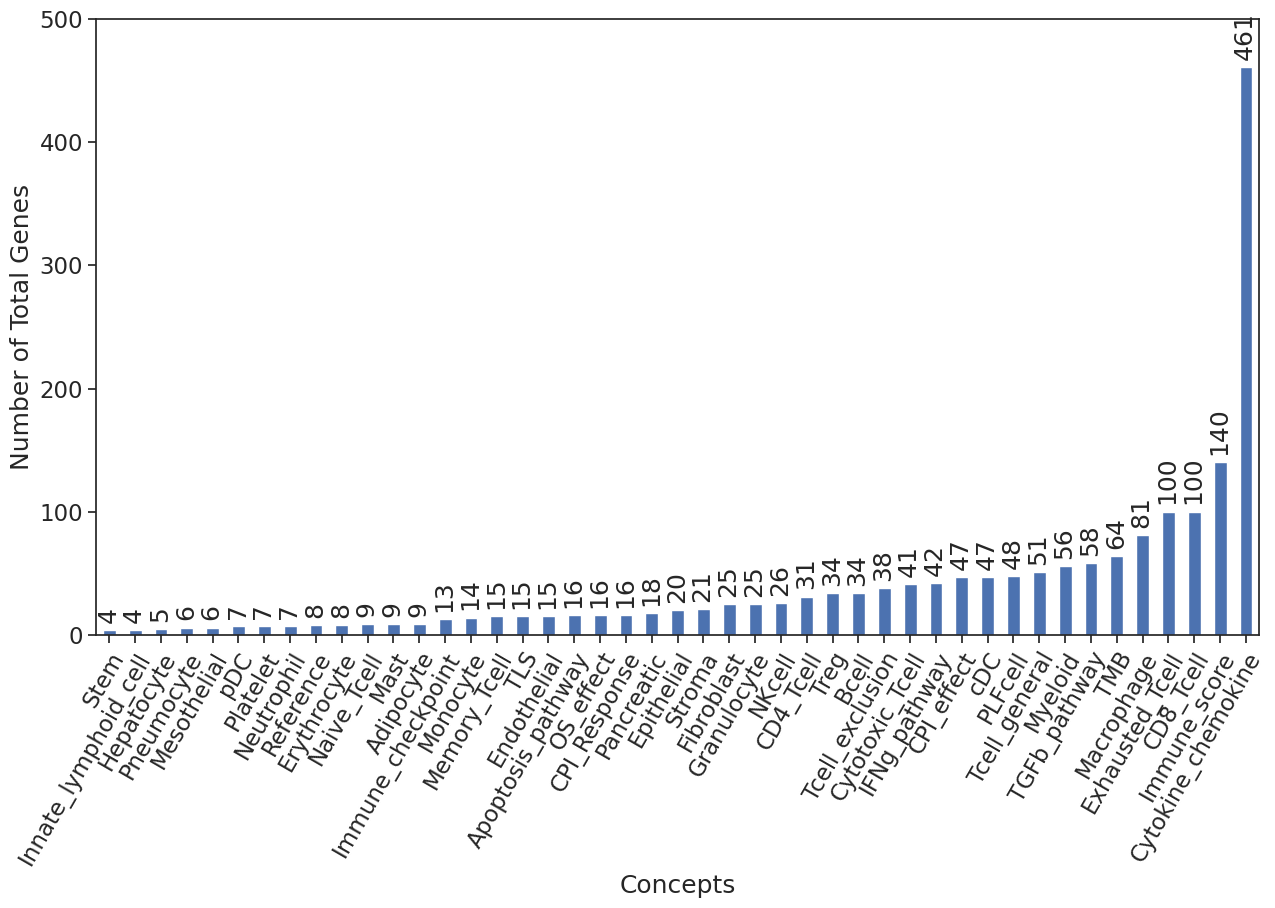

In [146]:
fig, ax = plt.subplots(figsize = (15,8))
y = 'total_num_genes'

df[y].plot(kind='bar', ax=ax)

ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_xticklabels(df.index, 
                    rotation=60, 
                    ha="right",  
                    rotation_mode="anchor")  # <====== HERE is the ke
ax.set_ylabel('Number of Total Genes')

for i in range(len(df)):
    ts = df.iloc[i]
    ax.text(i-0.5, ts[y]+10, str(ts.total_num_genes), rotation = 90)

ax.set_ylim(0, 500)
ax.set_xlabel('Concepts')

Text(0.5, 0, 'Concepts')

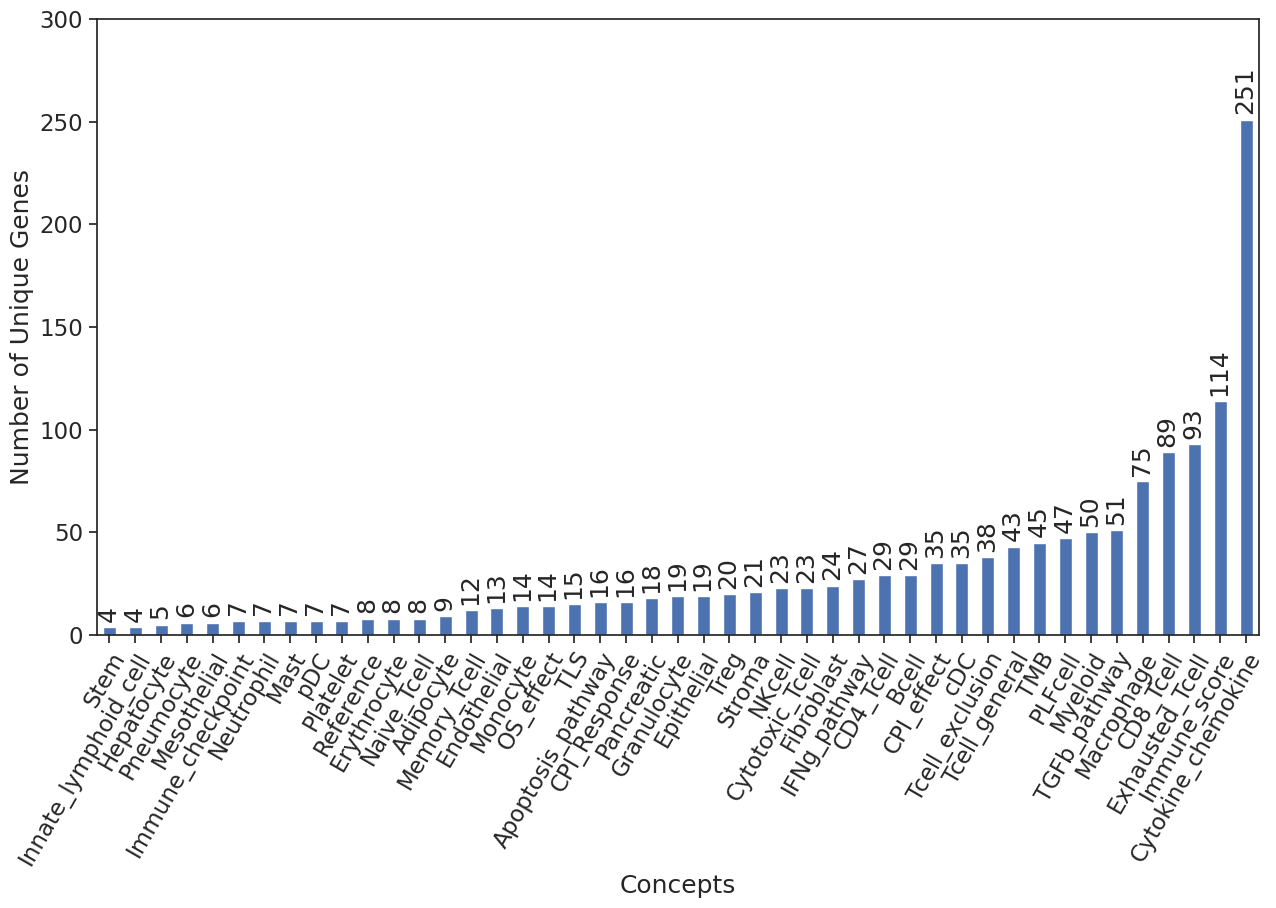

In [147]:
fig, ax = plt.subplots(figsize = (15,8))
y = 'total_num_unique_genes'

df = df.sort_values(y)
df[y].plot(kind='bar', ax=ax)

ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_xticklabels(df.index, 
                    rotation=60, 
                    ha="right",  
                    rotation_mode="anchor")  # <====== HERE is the ke
ax.set_ylabel('Number of Unique Genes')

for i in range(len(df)):
    ts = df.iloc[i]
    ax.text(i-0.5, ts[y]+5, str(ts[y]), rotation = 90)

ax.set_ylim(0, 300)
ax.set_xlabel('Concepts')

Text(0.5, 0, 'Concepts')

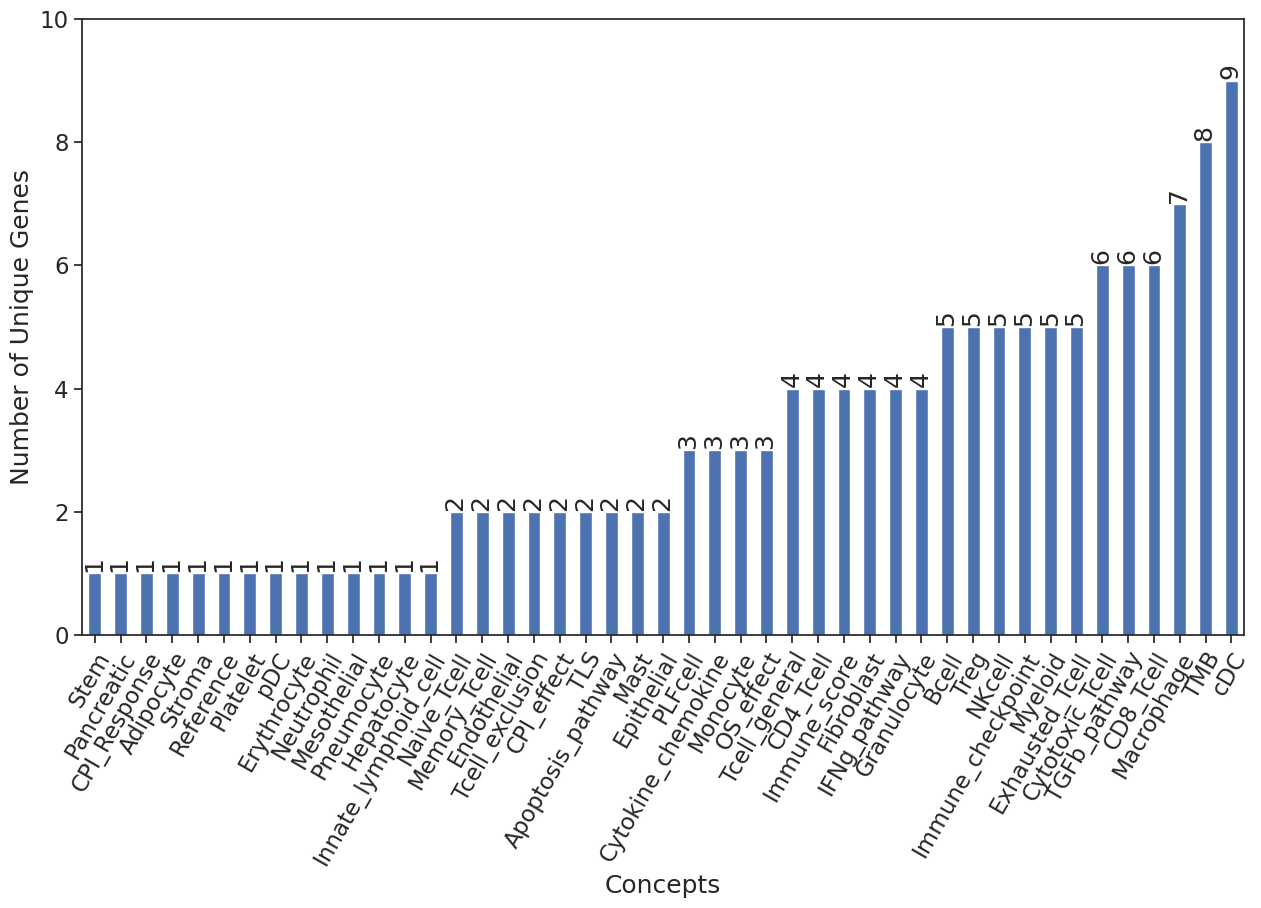

In [148]:
fig, ax = plt.subplots(figsize = (15,8))
y = 'num_genesets'

df = df.sort_values(y)
df[y].plot(kind='bar', ax=ax)

ax.tick_params(axis='both', which='major', right = False, top=False, direction = 'out',reset = True)
ax.set_xticklabels(df.index, 
                    rotation=60, 
                    ha="right",  
                    rotation_mode="anchor")  # <====== HERE is the ke
ax.set_ylabel('Number of Unique Genes')

for i in range(len(df)):
    ts = df.iloc[i]
    ax.text(i-0.5, ts[y]+0.1, str(ts[y]), rotation = 90)

ax.set_ylim(0, 10)
ax.set_xlabel('Concepts')

In [149]:
def compute_jaccard_index(set1, set2):
    set1 = set(set1)
    set2 = set(set2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union) if union else 0

def compute_jaccard_matrix(cell_types_series):
    cell_types = cell_types_series.index
    jaccard_matrix = pd.DataFrame(index=cell_types, columns=cell_types, dtype=float)

    for i, ct1 in enumerate(cell_types):
        for j, ct2 in enumerate(cell_types):
            if i <= j:  # 避免重复计算
                jaccard_index = compute_jaccard_index(set(cell_types_series[ct1]), set(cell_types_series[ct2]))
                jaccard_matrix.at[ct1, ct2] = jaccard_index
                jaccard_matrix.at[ct2, ct1] = jaccard_index

    return jaccard_matrix

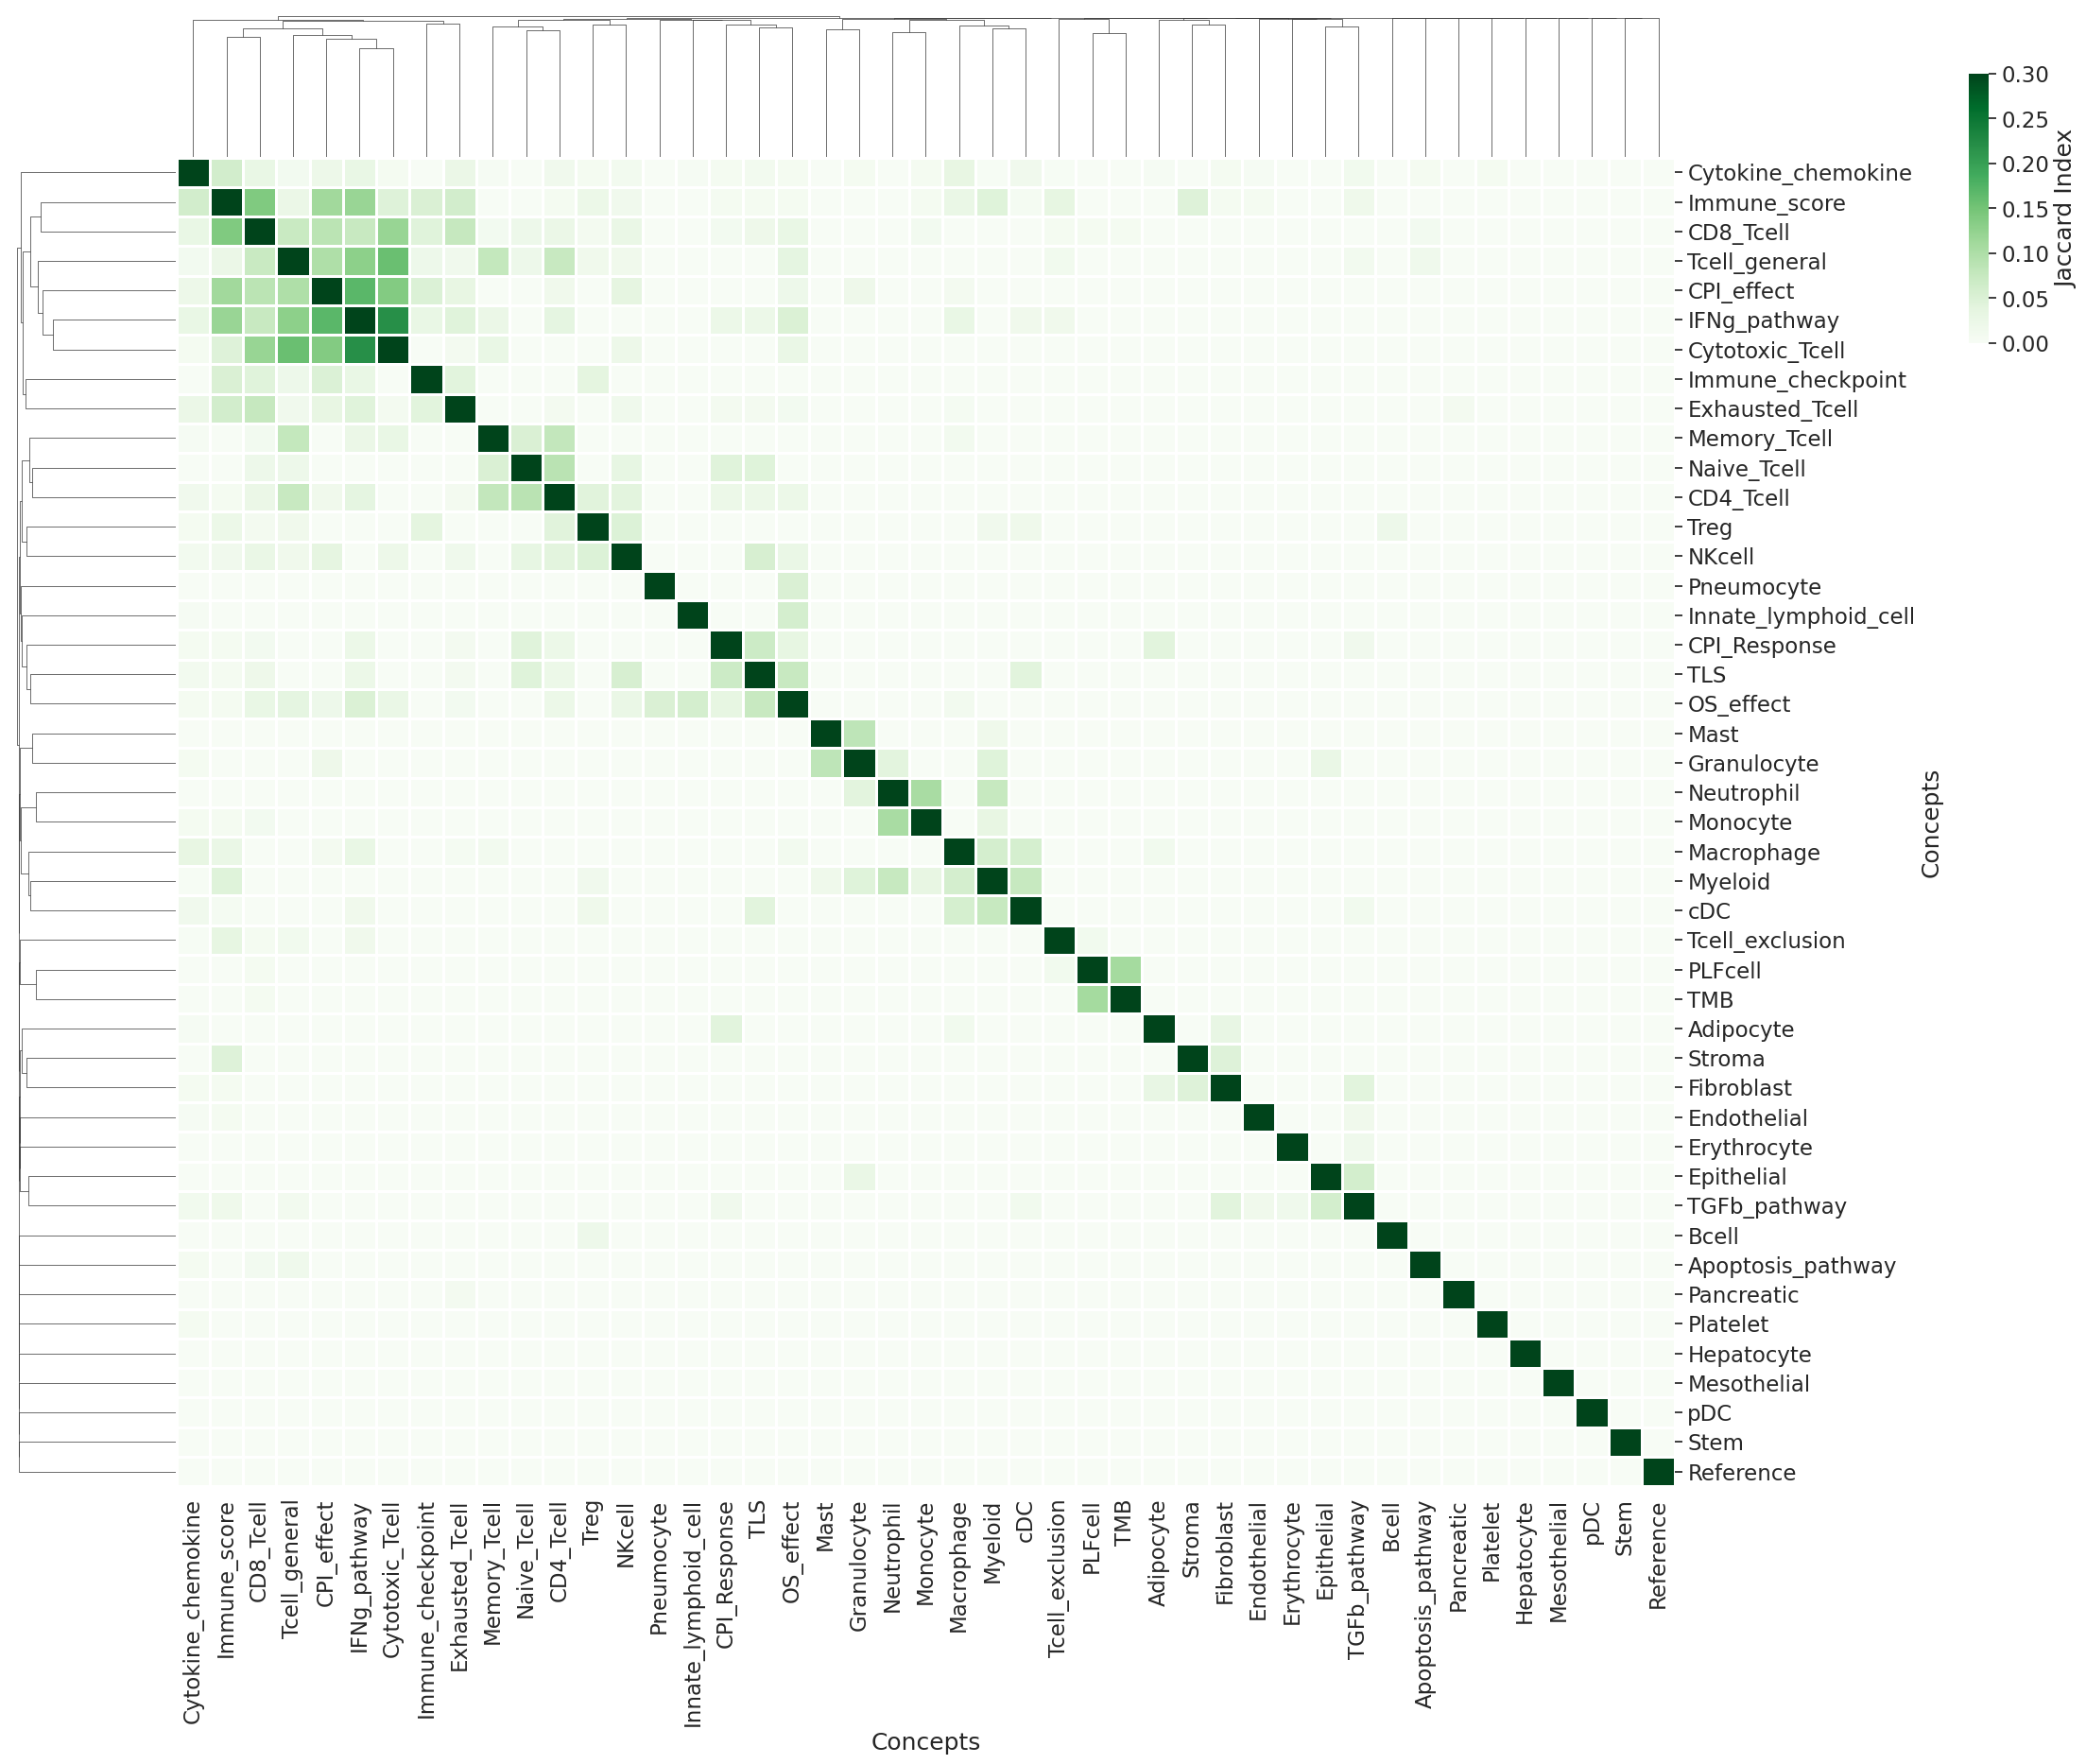

In [174]:
celltype_genes = df['unique_genes'].apply(lambda x:x.split(':'))
datap.columns.name = 'Concepts'
datap = compute_jaccard_matrix(celltype_genes)
datap.columns.name = 'Concepts'
datap.index.name = 'Concepts'

g = sns.clustermap(datap,  cmap="Greens",  #annot=True,
                   dendrogram_ratio=0.1, vmax=0.3, #tree_kws={'lengths': 2},
                   cbar_pos=(1, .8, .01, .15), cbar_kws = {'label':'Jaccard Index'},
                   linewidths=.75, figsize=(21, 19))
g.savefig('concept_jaccard_sim.jpg')

In [187]:
datap['Cytotoxic_Tcell']['Exhausted_Tcell']

0.008695652173913044

In [193]:
set(celltype_genes.loc['Exhausted_Tcell']) & set(celltype_genes.loc['Cytotoxic_Tcell'])

{'SAMD3'}

In [194]:
data_corr['Cytotoxic_Tcell']['Exhausted_Tcell']

0.7534479453756586

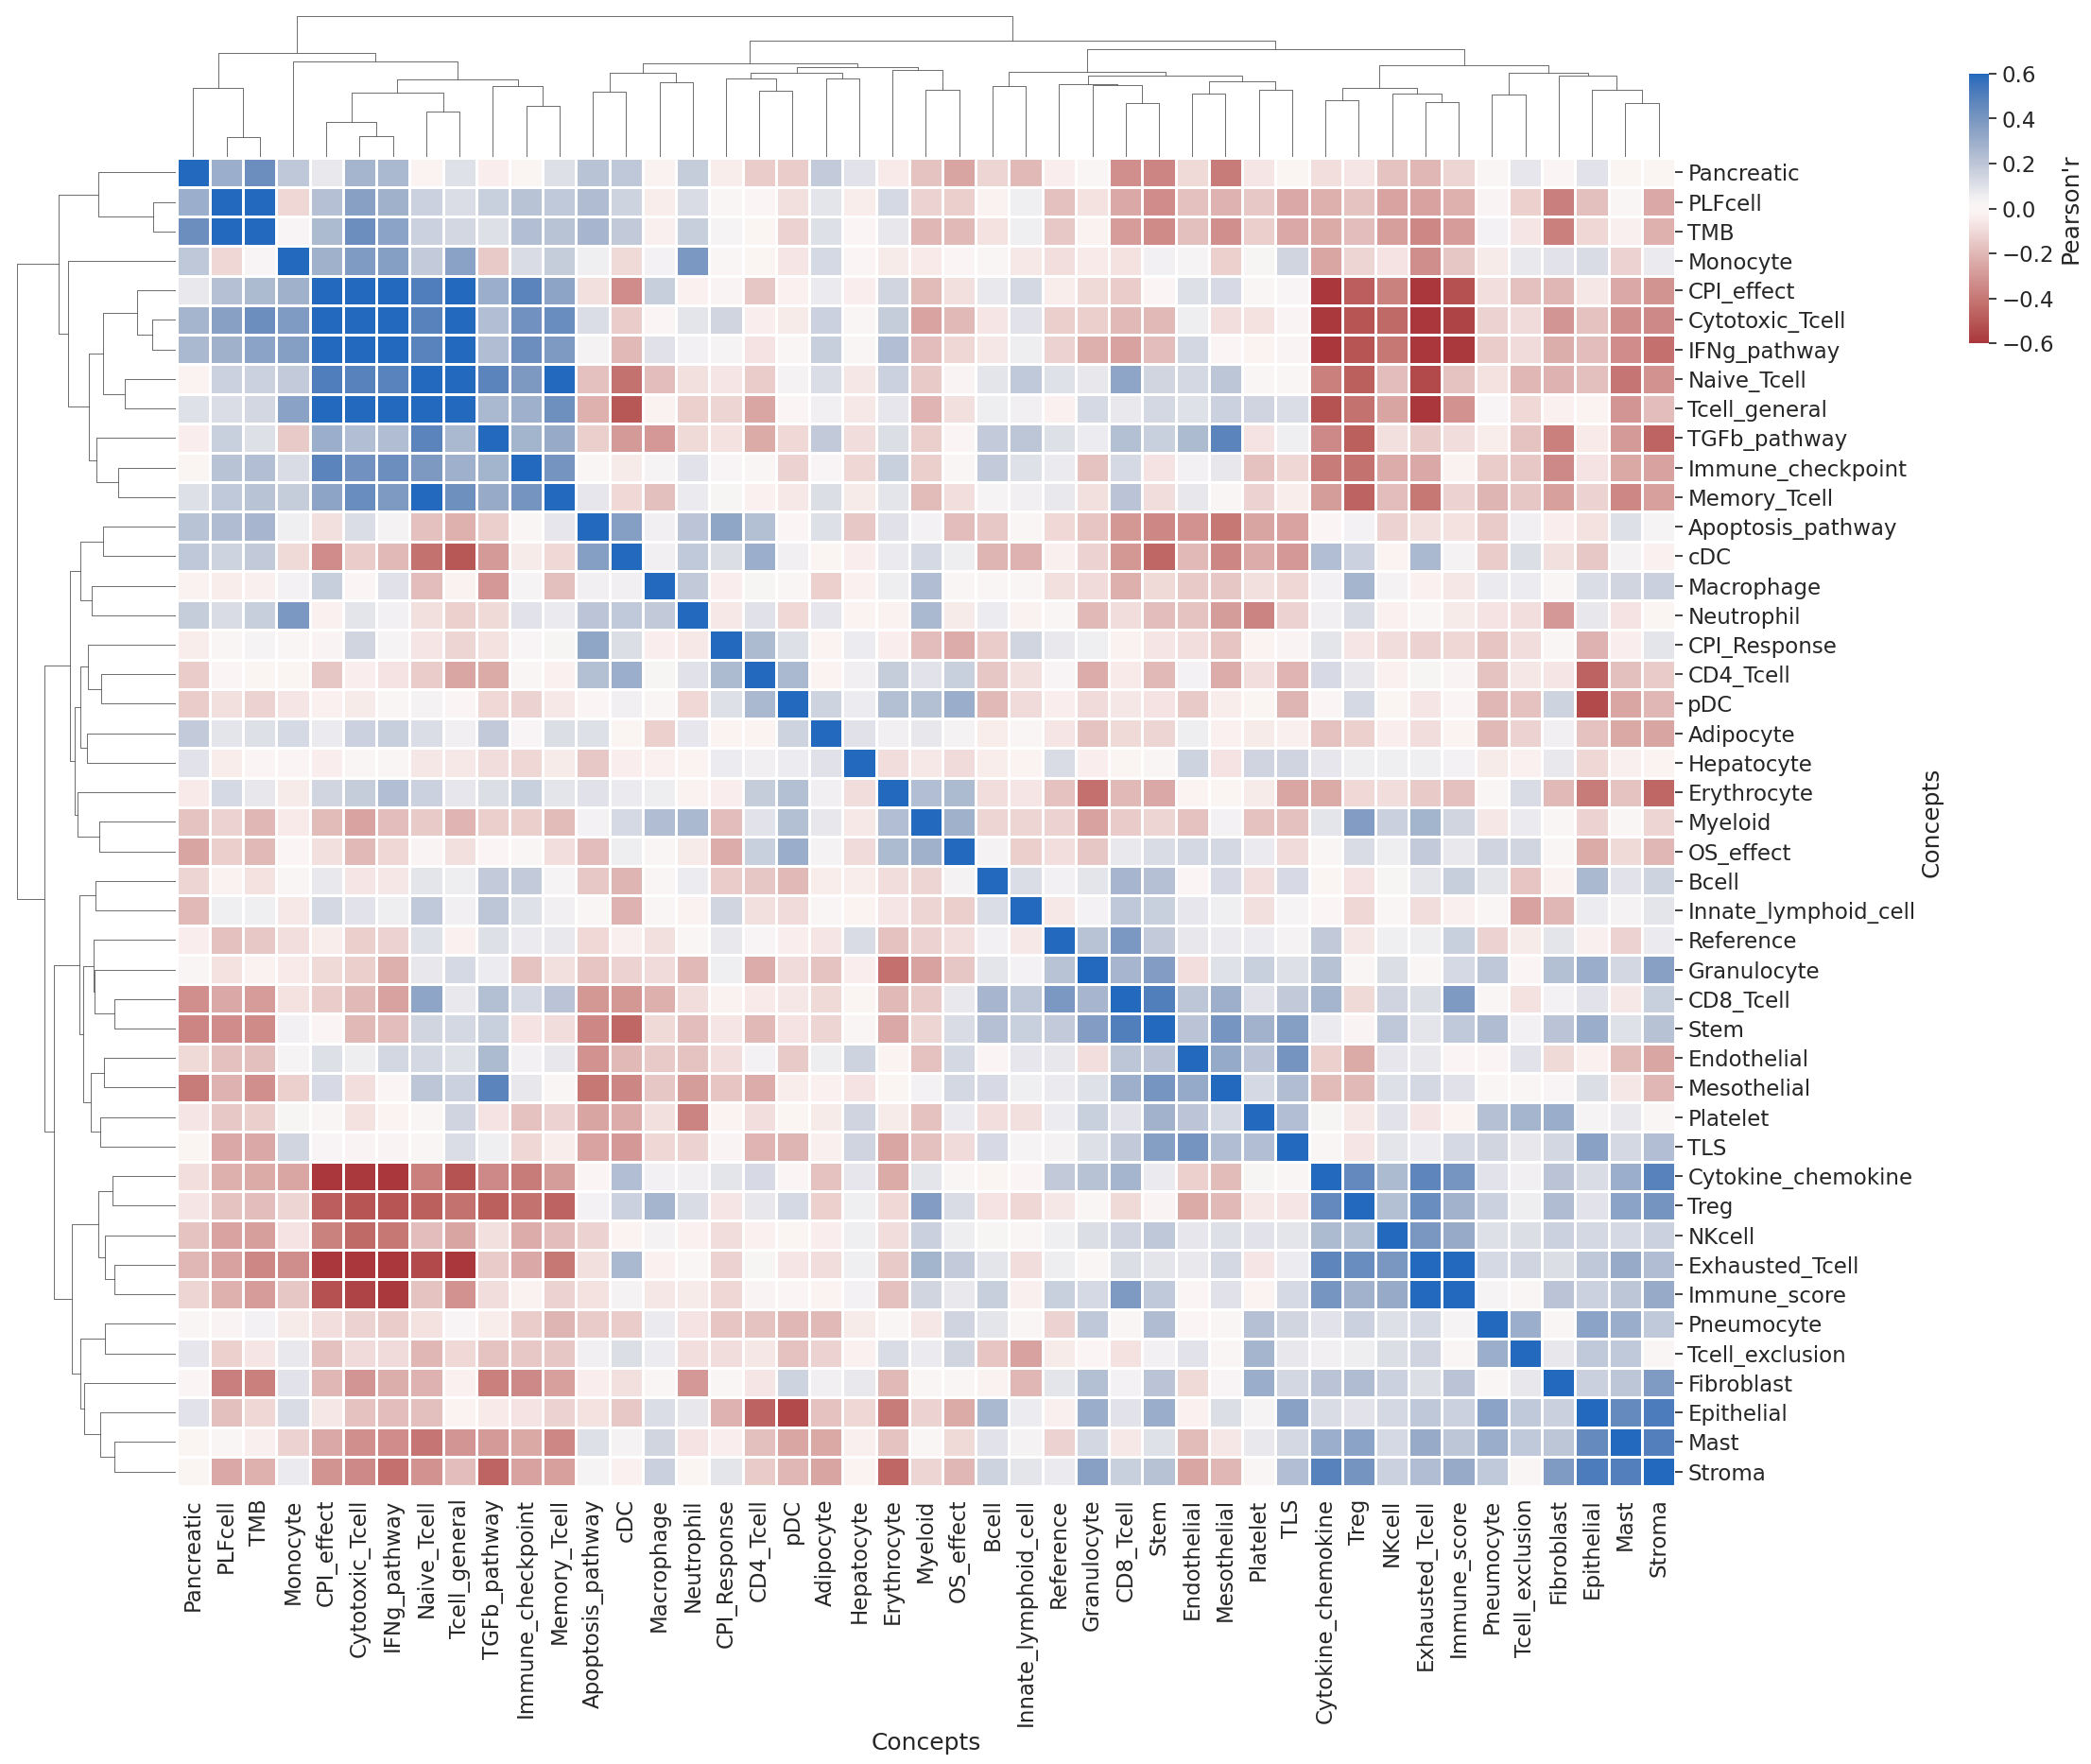

In [178]:
dfcs = pd.read_csv('../../02_extract_readouts/TCGA/02_readouts_celltype.csv', index_col=0)
dfcs = dfcs[dfcs.columns.difference(['CANCER'])]
data_corr = dfcs.corr()
data_corr.columns.name = 'Concepts'
data_corr.index.name = 'Concepts'
g = sns.clustermap(data_corr,   center=0, cmap="vlag_r",
                   dendrogram_ratio=0.1,  vmin=-0.6, vmax=0.6,
                   cbar_pos=(1, .8, .01, .15), cbar_kws = {'label':"Pearson'r"},
                   linewidths=.75, figsize=(21, 19))

g.savefig('concept_score_sim.jpg')

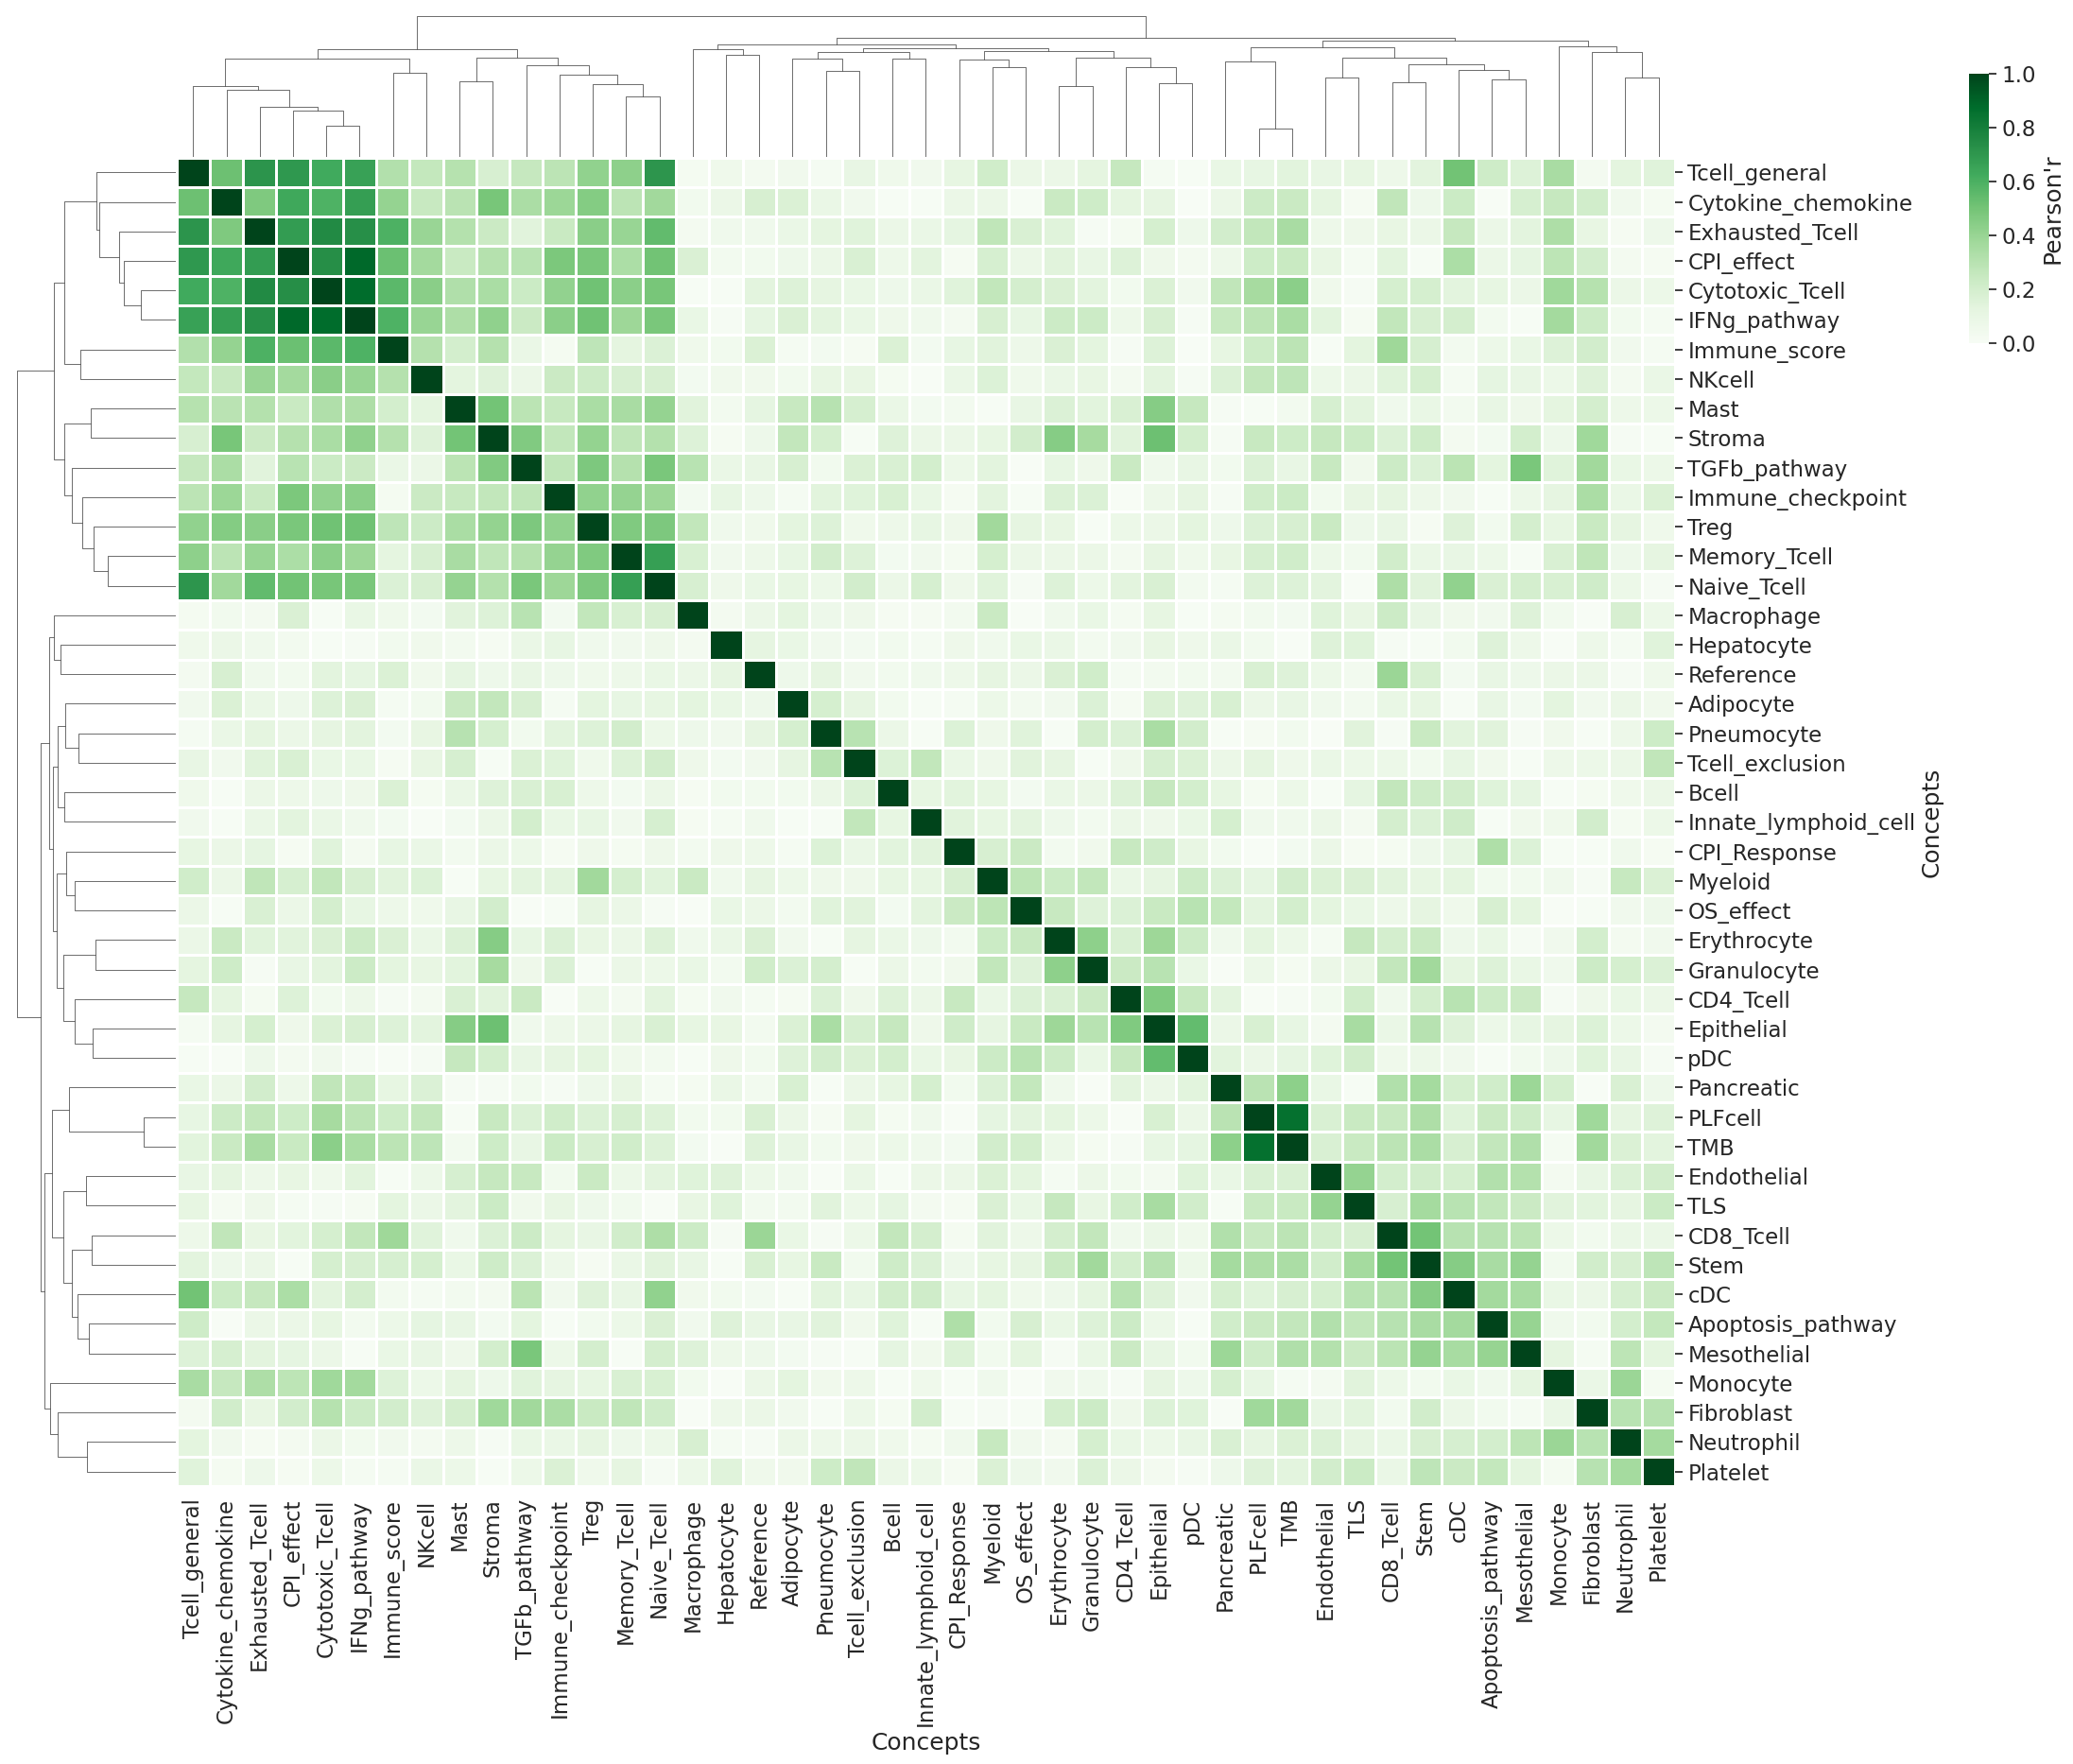

In [184]:
dfcs = pd.read_csv('../../02_extract_readouts/TCGA/02_readouts_celltype.csv', index_col=0)
dfcs = dfcs[dfcs.columns.difference(['CANCER'])]
data_corr = dfcs.corr().abs()
data_corr.columns.name = 'Concepts'
data_corr.index.name = 'Concepts'
g = sns.clustermap(data_corr,   cmap="Greens",
                   dendrogram_ratio=0.1,  vmin=0, vmax=1,
                   cbar_pos=(1, .8, .01, .15), cbar_kws = {'label':"Pearson'r"},
                   linewidths=.75, figsize=(21, 19))

g.savefig('concept_score_sim2.jpg')